In [60]:
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

<h2>Legend:</h2>
- class<br>
    0: Common nevus<br>
    1: Atypical nevus<br>
    2: Melanoma<br><br>
- asymmetry<br>
    0: Fully Simmetry<br>
    1: Asymmetry in one axis<br>
    2: Fully asimmetry<br><br>
- pigment<br>
    AT: Atypical<br>
    T: Typical<br><br>
- dots<br>
    A: Absent<br>
    AT: Atypical<br>
    T: Typical<br><br>
- streaks<br>
    A: Absent<br>
    P: Present<br><br>
- regression_area<br>
    A: Absent<br>
    P: Present<br><br>
- blue_whitish_veil<br>
    A: Absent<br>
    P: Present<br>
<br><br>The remaining columns are set to 1 if true, 0 if not.

In [4]:
data = pd.read_csv("moles.csv")
data.head(6)

,class,asymmetry,pigment,dots,streaks,regression_area,blue_whitish_veil,white,red,light_brown,dark_brown,blue_gray,black
0,0,0,T,A,A,A,A,0,0,0,1,0,0
1,0,0,T,A,A,A,A,0,0,1,0,0,0
2,0,0,T,T,A,A,A,0,0,1,1,0,0
3,0,0,T,A,A,A,A,0,0,1,0,0,0
4,0,0,T,A,A,A,A,0,0,1,1,0,0
5,0,0,T,T,A,A,A,0,0,1,0,0,0


In [13]:
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['class', 'asymmetry', 'pigment', 'dots', 'streaks', 'regression_area',
       'blue_whitish_veil', 'white', 'red', 'light_brown', 'dark_brown',
       'blue_gray', 'black'],
      dtype='object')


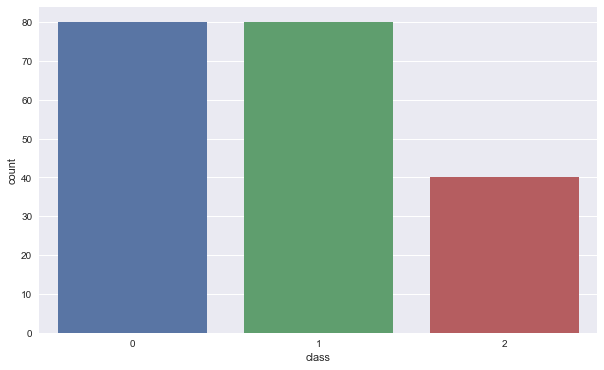

Number of Common:  80
Number of Atypical :  80
Number of Melanoma :  40


In [52]:
y = data['class']
plt.figure(figsize=(10,6))
ax = sns.countplot(y,label="Count")
plt.show()
C, A, M = y.value_counts()
print('Number of Common: ',C)
print('Number of Atypical : ',A)
print('Number of Melanoma : ',M)

In [40]:
list = ['class']
x = data.drop(list,axis = 1 )
x.head()

,asymmetry,pigment,dots,streaks,regression_area,blue_whitish_veil,white,red,light_brown,dark_brown,blue_gray,black
0,0,1,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0
2,0,1,2,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,1,1,0,0


In [41]:
x.describe()

,asymmetry,pigment,dots,streaks,regression_area,blue_whitish_veil,white,red,light_brown,dark_brown,blue_gray,black
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.675000,0.420000,0.835000,0.150000,0.125000,0.180000,0.095000,0.050000,0.695000,0.780000,0.190000,0.205000
std,0.862027,0.494797,0.825337,0.357967,0.331549,0.385152,0.293951,0.218492,0.461563,0.415286,0.393285,0.404715
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


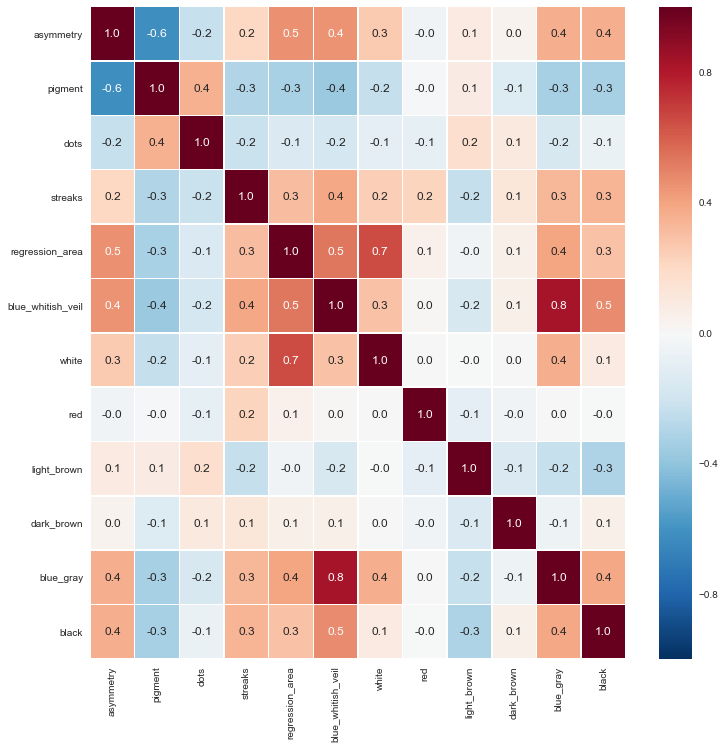

In [58]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

We don't have correlated features. Removing "blue_gray" seems not to increase the accuracy.

Accuracy is:  0.95


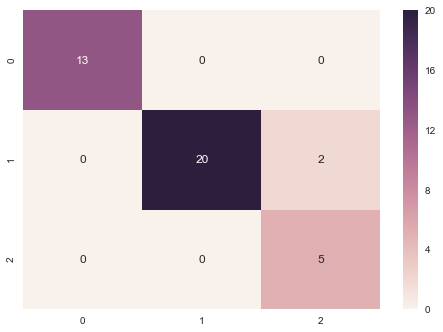

In [106]:
# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ', ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [107]:
# Try on different ML models
models = [SVC(kernel='rbf', random_state=0), SVC(kernel='linear', random_state=0), LogisticRegression()]
model_names = ['SVC_rbf', 'SVC_linear', 'Logistic Regression']
for i, model in enumerate(models):
    model.fit(x_train, y_train)
    print ('The accuracy of ' + model_names[i] + ' is: ' + str(accuracy_score(y_test, model.predict(x_test))))

The accuracy of SVC_rbf is: 0.95
The accuracy of SVC_linear is: 0.975
The accuracy of Logistic Regression is: 0.925
